## **A. Load thư viện**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **B. Phân loại Gausian Naive Bayes Classification**

> *Phân bố của đặc trưng $X_i$ trên mỗi class $c$ giả sử có phân phối Gauss*
$$P(X_i|c) = \frac{1}{\sqrt{2\pi\sigma_c^2}}\exp\Big(-\frac{(X_i-\mu_c)^2}{2\sigma_c^2}\Big)$$

> ### **1. Load dữ liệu hoa Iris, mô tả phân bố và sự tương quan các đặc trưng trên mỗi class**




,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Số dữ liệu tập train: 105 và tập test: 45


Text(0.5, 0.98, 'Biểu đồ scatter giữa các đặc trưng trên mỗi loài hoa')

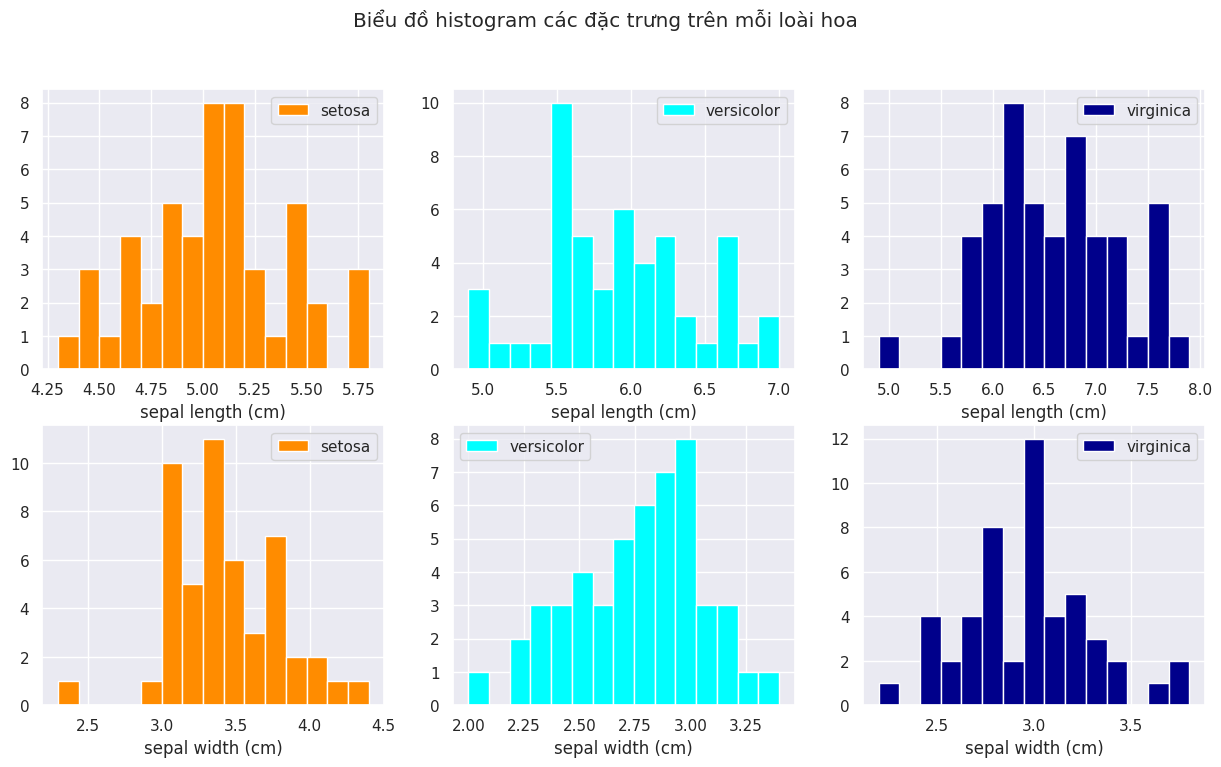

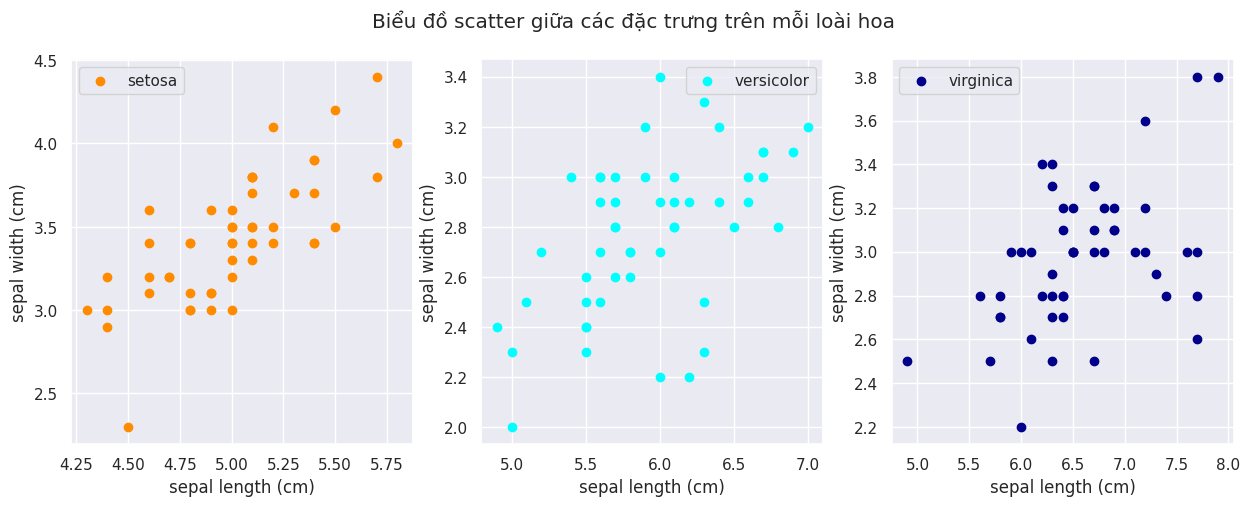

In [2]:
iris = datasets.load_iris(as_frame=True)
X_iris = iris.data[iris.feature_names[0:2]]
y_iris = iris.target
display(X_iris.head(5))

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=0)
print("Số dữ liệu tập train: %i và tập test: %i" % (X_train.shape[0], X_test.shape[0]))

sns.set()
cmap = ["darkorange", "cyan", "darkblue"]
plt.figure(figsize=(15, 8))

for id, col in enumerate(iris.feature_names[0:2]):
  for i in range(3):
    plt.subplot(2,3,3*id+i+1)
    col_data = X_iris[col].where(cond=y_iris==i).values ##Lọc dữ liệu theo loài hoa
    plt.hist(col_data, bins=15, color=cmap[i])
    plt.xlabel(col)
    plt.legend([iris.target_names[i]])
plt.suptitle("Biểu đồ histogram các đặc trưng trên mỗi loài hoa")

plt.figure(figsize=(15, 5))
for i in range(3):
  plt.subplot(1,3,i+1)
  x_data = X_iris['sepal length (cm)'].where(cond=y_iris==i).values  ##Lọc dữ liệu theo loài hoa
  y_data = X_iris['sepal width (cm)'].where(cond=y_iris==i).values  ##Lọc dữ liệu theo loài hoa
  plt.scatter(x_data, y_data, color=cmap[i])
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  plt.legend([iris.target_names[i]])
plt.suptitle("Biểu đồ scatter giữa các đặc trưng trên mỗi loài hoa")

> *Nhận xét: Dựa vào biểu đồ mô tả 2 đặc trưng chiều dài và chiều rộng đài hoa Iris, ta thấy:*
>> *- Phân bố các đặc trưng trên mỗi loài hoa khá đối xứng*

>> *- Tương quan giữa 2 đặc trưng có phụ thuộc nhau khá nhiều*

> *Chú ý: Dùng các thống kê mô tả và thống kê suy diễn để phân tích dạng phân bố và sự tương quan giữa các đặc trưng trên mỗi class*

> ### **2. Mô hình Gausian NB, dự đoán và đánh giá độ chính xác**




In [3]:
GNB = naive_bayes.GaussianNB()
GNB.fit(X_train, y_train)

acc_scr_train = GNB.score(X_train, y_train)
acc_scr_test = GNB.score(X_test, y_test)

print("Độ chính xác phân loại của tập train: %.2f%% và tập test: %.2f%%" % (acc_scr_train*100, acc_scr_test*100))

X_test_grp = X_test.iloc[0:5]
y_test_pred = GNB.predict(X_test_grp)
y_test_prob = GNB.predict_proba(X_test_grp)

print("\t   X_test \t   y_test \t   y_pred \t\t   Probabilities")
for i in range(5):
  print("\t", X_test.iloc[i].values,"\t", iris.target_names[y_test.iloc[i]], "\t", iris.target_names[y_test_pred[i]], "\t", y_test_prob[i])


Độ chính xác phân loại của tập train: 80.95% và tập test: 80.00%
	   X_test 	   y_test 	   y_pred 		   Probabilities
	 [5.8 2.8] 	 virginica 	 versicolor 	 [0.02545295 0.71168259 0.26286446]
	 [6.  2.2] 	 versicolor 	 versicolor 	 [8.49815893e-04 8.52678869e-01 1.46471315e-01]
	 [5.5 4.2] 	 setosa 	 setosa 	 [0.99060256 0.00155575 0.00784169]
	 [7.3 2.9] 	 virginica 	 virginica 	 [7.10762096e-10 5.13237792e-02 9.48676220e-01]
	 [5.  3.4] 	 setosa 	 setosa 	 [0.96093547 0.02561454 0.01344998]


> *Nhận xét: Độ chính xác phân loại của Gauss NB không cao do có sự phụ thuộc giữa các đặc trưng trên mỗi loài hoa.*

> ### **3. Đánh giá mô hình GNB với cross-validation**

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

## Đánh giá GNB ban đầu
GNB = naive_bayes.GaussianNB()
GNB.fit(X_train, y_train)

acc_scr_train = GNB.score(X_train, y_train)

## Đánh giá GNB với cross-validation 5-fold không shuffle tập train
score = cross_val_score(GNB, X_train, y_train, cv=5)

## Đánh giá GNB với cross-validation 5-fold có shuffle tập train
cv_split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
score_shuffle = cross_val_score(GNB, X_train, y_train, cv=cv_split)

print("Đánh giá độ chính xác mô hình GNB trên tập train:")
print("   - Ban đầu (no-validation): %.2f%%" % (acc_scr_train*100))
print("   - Cross-validation, no shuffle: trung bình %.2f%% và độ lệch %.2f%%" % (np.mean(score)*100, np.std(score)*100))
print("   - Cross-validation, shuffle: trung bình %.2f%% và độ lệch %.2f%%" % (np.mean(score_shuffle)*100, np.std(score_shuffle)*100))

Đánh giá độ chính xác mô hình GNB trên tập train:
   - Ban đầu (no-validation): 80.95%
   - Cross-validation, no shuffle: trung bình 79.05% và độ lệch 11.11%
   - Cross-validation, shuffle: trung bình 78.75% và độ lệch 5.00%


> *Nhận xét: Mô hình GNB qua cross-validation cho kết quả xấp xỉ như mô hình ban đầu.*

> ### **4. Một số cải tiến mô hình GNB cơ bản**

>> ***a) Cho trước phân bố (tiên nghiệm) của các class***

Độ chính xác phân loại của tập train: 79.05% và tập test: 75.56%


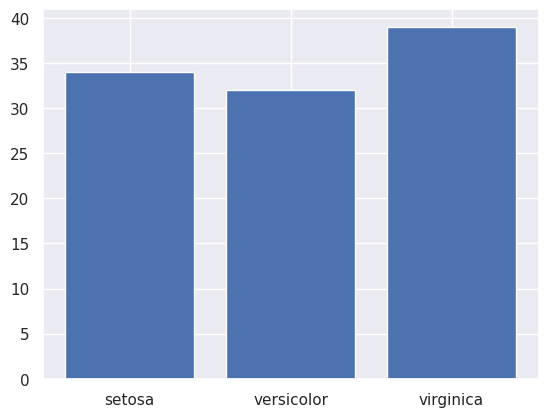

In [5]:
freq = y_train.value_counts().sort_index()
plt.bar(iris.target_names[freq.index], freq.values)

prior_dis = [0.4, 0.3, 0.3] ## Phân bố tiên nghiệm
GNB = naive_bayes.GaussianNB(priors = prior_dis)
GNB.fit(X_train, y_train)

acc_scr_train = GNB.score(X_train, y_train)
acc_scr_test = GNB.score(X_test, y_test)

print("Độ chính xác phân loại của tập train: %.2f%% và tập test: %.2f%%" % (acc_scr_train*100, acc_scr_test*100))

>> ***b) Smoothing phương sai lớn nhất***

In [6]:
print("Variance smooth \t Độ chính xác tập train \t Độ chính xác tập test")
for k in range(1,10):
  val = k*(10**k)*1e-9
  GNB = naive_bayes.GaussianNB(var_smoothing=val)
  GNB.fit(X_train, y_train)
  acc_scr_train = GNB.score(X_train, y_train)
  acc_scr_test = GNB.score(X_test, y_test)
  print("   %.8f \t\t\t %.2f%% \t\t\t %.2f%%" % (val, acc_scr_train*100, acc_scr_test*100))

Variance smooth 	 Độ chính xác tập train 	 Độ chính xác tập test
   0.00000001 			 80.95% 			 80.00%
   0.00000020 			 80.95% 			 80.00%
   0.00000300 			 80.95% 			 80.00%
   0.00004000 			 80.95% 			 80.00%
   0.00050000 			 80.95% 			 80.00%
   0.00600000 			 80.95% 			 80.00%
   0.07000000 			 81.90% 			 77.78%
   0.80000000 			 80.95% 			 77.78%
   9.00000000 			 63.81% 			 57.78%


> *Nhận xét: Variance smoothing càng lớn thì độ chính xác dự báo Gause NB càng giảm*

>> ***c) Loại một số đặc trưng có mức độ phụ thuộc nhiều, gây nhiễu***


,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2
0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0
1,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0
3,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0
4,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0


Độ chính xác phân loại của tập train: 27.55% và tập test: 26.01%
Đặc trưng loại 	 Độ chính xác tập train 	 Độ chính xác tập test
  pixel_0_1 		 28.94% 			 27.54%
  pixel_0_2 		 26.62% 			 25.31%
  pixel_0_3 		 26.99% 			 25.59%
  pixel_0_4 		 26.99% 			 25.31%
  pixel_0_5 		 27.74% 			 25.45%
  pixel_0_6 		 26.72% 			 24.48%
  pixel_0_7 		 31.54% 			 29.21%
  pixel_1_0 		 31.35% 			 31.15%
  pixel_1_1 		 24.77% 			 24.06%
  pixel_1_2 		 27.27% 			 25.31%


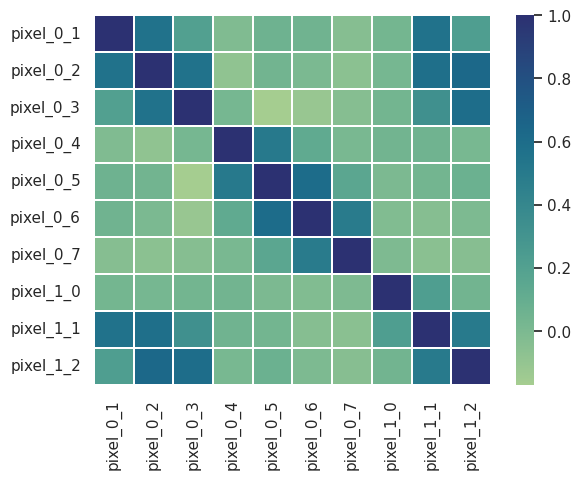

In [7]:
## Chọn 10 đặc trưng đầu của dữ liệu chữ số digit
digit = datasets.load_digits(as_frame=True)
X_digit = digit.data[digit.feature_names[1:11]]
y_digit = digit.target
display(X_digit.head(5))

X_train, X_test, y_train, y_test = train_test_split(X_digit, y_digit, test_size=0.4, random_state=0)

## Mô hình Gauss NB và đánh giá
GNB = naive_bayes.GaussianNB()
GNB.fit(X_train, y_train)
acc_scr_train = GNB.score(X_train, y_train)
acc_scr_test = GNB.score(X_test, y_test)
print("Độ chính xác phân loại của tập train: %.2f%% và tập test: %.2f%%" % (acc_scr_train*100, acc_scr_test*100))

## Biểu đồ ma trận tương quan giữa các đặc trưng của dữ liệu
correl_matrix = X_digit.corr()
sns.heatmap(correl_matrix, xticklabels=correl_matrix.columns, yticklabels=correl_matrix.columns, annot=False, linewidths=0.2, cmap="crest")

## Loại một số đặc trưng và xây dựng lại mô hình Gauss NB và đánh giá
print("Đặc trưng loại \t Độ chính xác tập train \t Độ chính xác tập test")
for col in X_train.columns:
  X_train_new = X_train.drop(labels=col, axis=1)
  X_test_new = X_test.drop(labels=col, axis=1)
  GNB_new = naive_bayes.GaussianNB()
  GNB_new.fit(X_train_new, y_train)
  acc_scr_train_new = GNB_new.score(X_train_new, y_train)
  acc_scr_test_new = GNB_new.score(X_test_new, y_test)
  print("  %s \t\t %.2f%% \t\t\t %.2f%%" % (col, acc_scr_train_new*100, acc_scr_test_new*100))

> *Nhận xét: Loại đặc trưng **pixel_0_7** hay **pixel_1_0** thì cải thiện được độ chính xác của mô hình*

>> ***d) Ước lượng phân bố khác Gauss cho các đặc trưng trên mỗi class (advanced study)***

>> - *Dùng các phương pháp ước lượng phân phối trong thống kê*

>> - *Rời rạc hóa tập dữ liệu và dùng các mô hình Naive Bayes rời rạc*

## **C. Phân loại Bernoulli Naive Bayes Classification**

> *Phân bố của đặc trưng $X_i$ trên mỗi class $c$ giả sử có phân phối Gauss*
$$P(X_i|c) = p_i X_i + (1-p_i)(1-X_i) \quad\text{với } p_i=P(X_i=1), X_i\in\{0,1\}.$$